# Example of rainflow counting

In [1]:
import sys
sys.path.append("D:\\alexa\\Documents\\metal-fatigue")

In [2]:
import numpy as np
import pandas as pd
from metal_fatigue import rainfl
import matplotlib.pyplot as plt
import copy

%matplotlib notebook 

## Load data
Lets generate some load data and plot it.

<IPython.core.display.Javascript object>


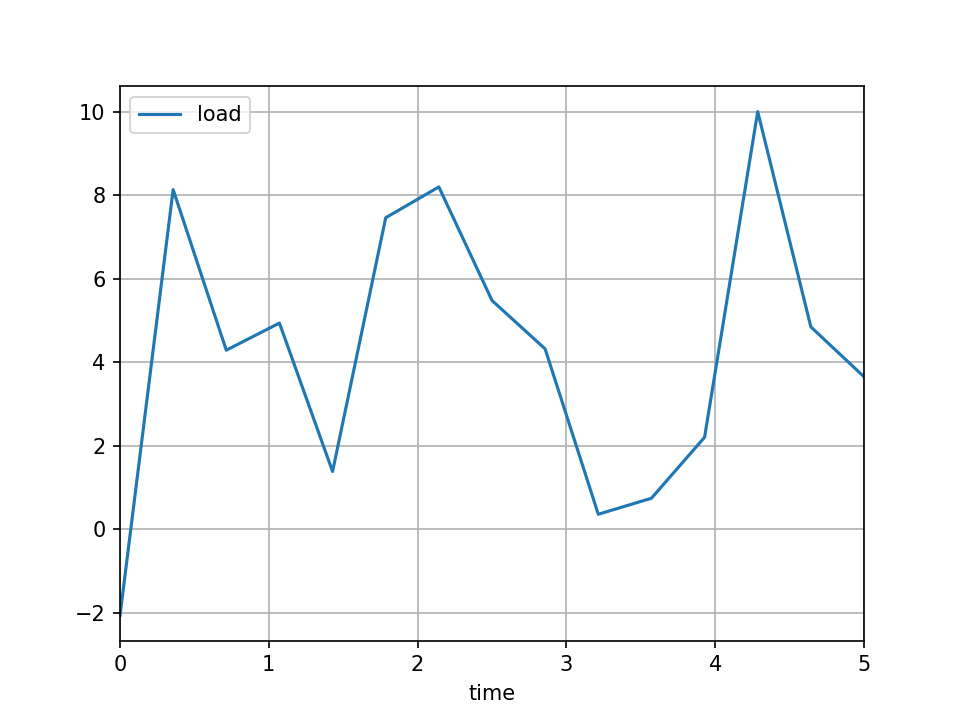

In [3]:
n = 15
series = pd.DataFrame(data={"time":np.linspace(0,5,n),
                            "load":np.random.normal(loc = 5, scale= 3, size = n)})
fig,ax = plt.subplots()
series.plot.line(x = "time", y = "load", ax = ax)
ax.grid()

# Rainflow counting with binned data

## Fast way

<IPython.core.display.Javascript object>


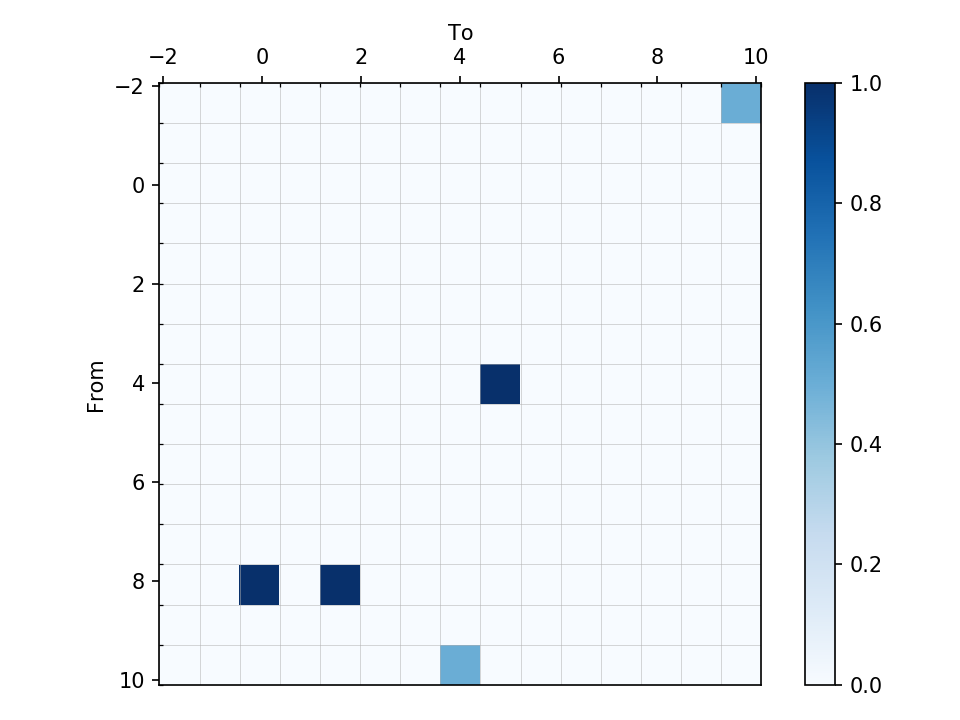

(<matplotlib.figure.Figure at 0x209e9cc7358>,
 <matplotlib.axes._subplots.AxesSubplot at 0x209ea139ac8>)

In [4]:
rfm,cache = rainfl.rainflow(series=series.load,numbins=15)
rfm.plot2d()

## Step by step

### Classification (binning) and turning points

In [5]:
series.load.to_csv("test.txt",index=False)

<IPython.core.display.Javascript object>


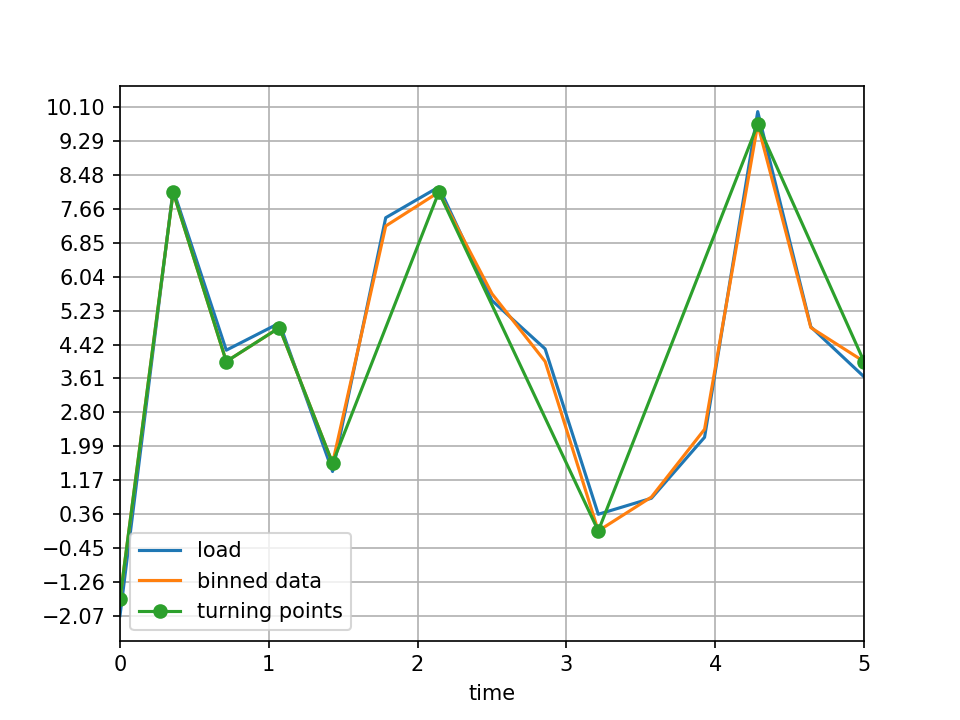

In [6]:
# bin data. Result is a binned object 
binned_series = rainfl.bin_series(series=series.load,
                  minedge=series.load.min(),
                  maxedge=series.load.max()*1.01,
                  numbins=15)
# index of turning points
turn_p_index = rainfl.turning_points(binned_series.values)
turn_p = copy.deepcopy(binned_series)
turn_p.values = binned_series.values[turn_p_index]
    
    
fig1,ax1 = plt.subplots()
series.plot.line(x = "time", y = "load", ax = ax1)
ax1.plot(series.time.values, 
         binned_series.bins[binned_series.values]+0.5*binned_series.binsize, 
         label = "binned data")
ax1.plot(series.time.values[turn_p_index], 
         binned_series.bins[binned_series.values[turn_p_index]]+0.5*binned_series.binsize, 
         "-o",
         label = "turning points")
ax1.grid()
ax1.set_yticks(binned_series.bins)
ax1.legend()

### Counting and plotting

<IPython.core.display.Javascript object>


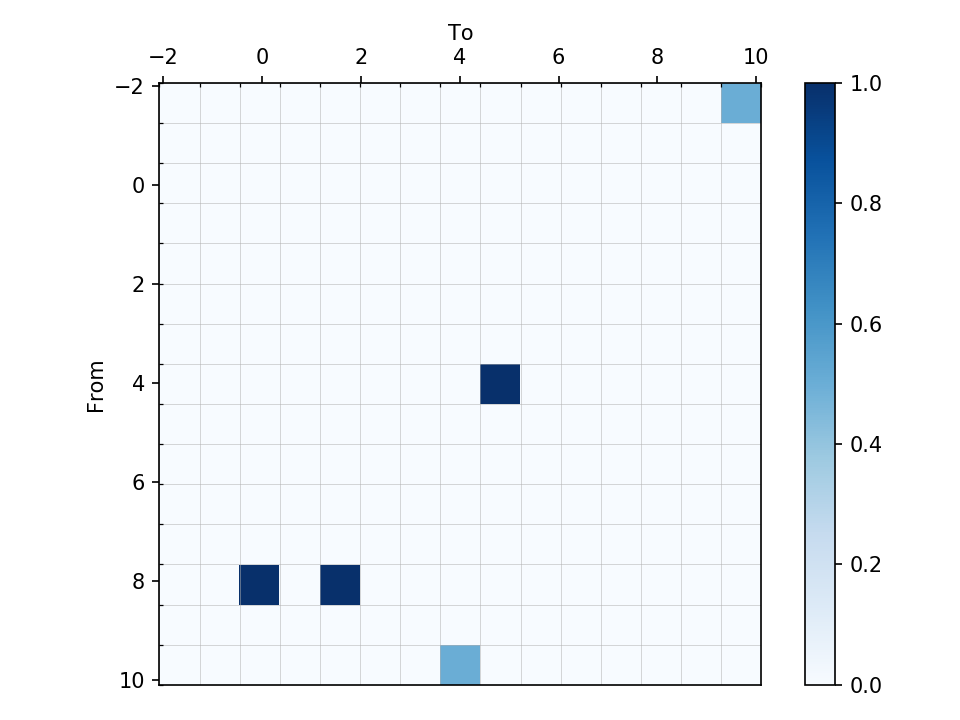

In [7]:
rfm, residuum = rainfl.binned_rainflow(turn_p)
fig2, ax2 = rfm.plot2d()

# Rainflow counting with continuous data

### Turnign points

<IPython.core.display.Javascript object>


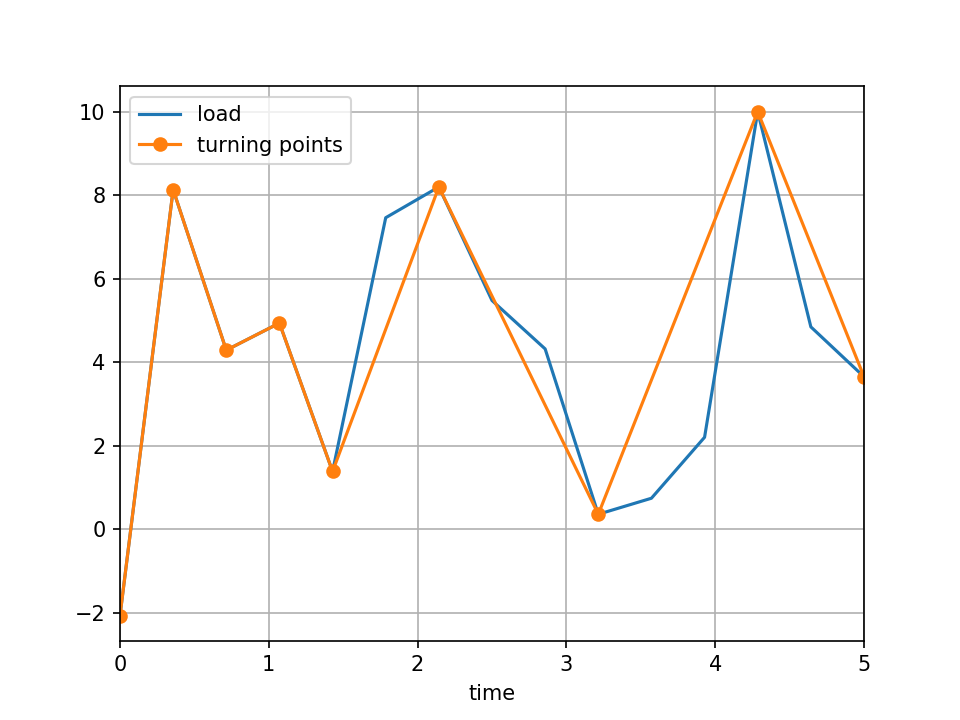

In [8]:
turn_p_index = rainfl.turning_points(series.load.values)
fig3,ax3 = plt.subplots()
series.plot.line(x = "time", y = "load", ax = ax3)
ax3.plot(series.time.values[turn_p_index], 
         series.load.values[turn_p_index], 
         "-o",
         label = "turning points")
ax3.grid()
ax3.legend()

### Cycle counting

In [9]:
range_, mean_, cycles_, cache = rainfl.continuous_rainflow(series.load.values[turn_p_index])
rf_res = pd.DataFrame(data={"range":range_,"mean":mean_,"cycles":cycles_})
rf_res

,cycles,mean,range
0,1.0,4.609917,0.649733
1,1.0,4.755280,6.749655
2,1.0,4.275223,7.837822
3,0.5,6.823543,6.349441
4,0.5,3.963968,12.068591
